<a href="https://colab.research.google.com/github/sudar-coder321/Game_DataAnalysis_Apriori/blob/main/Game_DataAnalysis_Apriori.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from apyori import apriori
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix

In [ ]:
!pip install apyori

In [ ]:
data = pd.read_csv('Game.csv')

In [ ]:
data

,User Id,Name,Hours,Behaviour
0,151603712,The Elder Scrolls V Skyrim,1.0,purchase
1,151603712,The Elder Scrolls V Skyrim,273.0,play
2,151603712,Fallout 4,1.0,purchase
3,151603712,Fallout 4,87.0,play
4,151603712,Spore,1.0,purchase
...,...,...,...,...
199995,128470551,Titan Souls,1.5,play
199996,128470551,Grand Theft Auto Vice City,1.0,purchase
199997,128470551,Grand Theft Auto Vice City,1.5,play
199998,128470551,RUSH,1.0,purchase


In [ ]:
data.head()

,User Id,Name,Hours,Behaviour
0,151603712,The Elder Scrolls V Skyrim,1.0,purchase
1,151603712,The Elder Scrolls V Skyrim,273.0,play
2,151603712,Fallout 4,1.0,purchase
3,151603712,Fallout 4,87.0,play
4,151603712,Spore,1.0,purchase


In [ ]:
data.tail()

,User Id,Name,Hours,Behaviour
199995,128470551,Titan Souls,1.5,play
199996,128470551,Grand Theft Auto Vice City,1.0,purchase
199997,128470551,Grand Theft Auto Vice City,1.5,play
199998,128470551,RUSH,1.0,purchase
199999,128470551,RUSH,1.4,play


In [ ]:
data.describe()

,User Id,Hours
count,2.000000e+05,200000.000000
mean,1.036559e+08,17.874384
std,7.208074e+07,138.056952
min,5.250000e+03,0.100000
25%,4.738420e+07,1.000000
50%,8.691201e+07,1.000000
75%,1.542309e+08,1.300000
max,3.099031e+08,11754.000000


In [ ]:
data.dtypes

User Id        int64
Name          object
Hours        float64
Behaviour     object
dtype: object

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   User Id    200000 non-null  int64  
 1   Name       200000 non-null  object 
 2   Hours      200000 non-null  float64
 3   Behaviour  200000 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 6.1+ MB


In [ ]:
data.isnull()

,User Id,Name,Hours,Behaviour
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
199995,False,False,False,False
199996,False,False,False,False
199997,False,False,False,False
199998,False,False,False,False


In [ ]:
len(data.isnull())

200000

In [ ]:
data.isnull().sum()

User Id      0
Name         0
Hours        0
Behaviour    0
dtype: int64

## Preprocessing Data
### Removing NULL Values

In [ ]:
data.dropna(inplace=True)

In [ ]:
data

,User Id,Name,Hours,Behaviour
0,151603712,The Elder Scrolls V Skyrim,1.0,purchase
1,151603712,The Elder Scrolls V Skyrim,273.0,play
2,151603712,Fallout 4,1.0,purchase
3,151603712,Fallout 4,87.0,play
4,151603712,Spore,1.0,purchase
...,...,...,...,...
199995,128470551,Titan Souls,1.5,play
199996,128470551,Grand Theft Auto Vice City,1.0,purchase
199997,128470551,Grand Theft Auto Vice City,1.5,play
199998,128470551,RUSH,1.0,purchase


### Removing Duplicates

In [ ]:
data = data.drop_duplicates()

In [ ]:
data

,User Id,Name,Hours,Behaviour
0,151603712,The Elder Scrolls V Skyrim,1.0,purchase
1,151603712,The Elder Scrolls V Skyrim,273.0,play
2,151603712,Fallout 4,1.0,purchase
3,151603712,Fallout 4,87.0,play
4,151603712,Spore,1.0,purchase
...,...,...,...,...
199995,128470551,Titan Souls,1.5,play
199996,128470551,Grand Theft Auto Vice City,1.0,purchase
199997,128470551,Grand Theft Auto Vice City,1.5,play
199998,128470551,RUSH,1.0,purchase


In [ ]:
data.corr()

,User Id,Hours
User Id,1.000000,0.004453
Hours,0.004453,1.000000


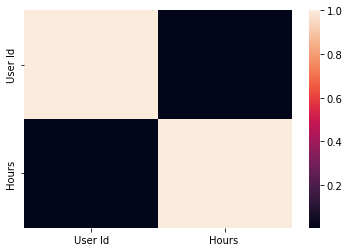

In [ ]:
ax = sns.heatmap(data.corr())

### EDA and Data Cleaning (Removing Unncessary Data)

In [ ]:
data1 = data.drop(columns=['User Id'])

In [ ]:
data1

,Name,Hours,Behaviour
0,The Elder Scrolls V Skyrim,1.0,purchase
1,The Elder Scrolls V Skyrim,273.0,play
2,Fallout 4,1.0,purchase
3,Fallout 4,87.0,play
4,Spore,1.0,purchase
...,...,...,...
199995,Titan Souls,1.5,play
199996,Grand Theft Auto Vice City,1.0,purchase
199997,Grand Theft Auto Vice City,1.5,play
199998,RUSH,1.0,purchase


In [ ]:
data1.corr()

,Hours
Hours,1.0


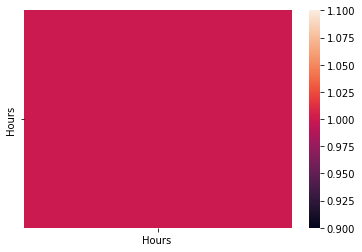

In [ ]:
ax = sns.heatmap(data1.corr())

### Note - In this case Correlation on 1 attribute does not make sense so we pre-process the Behaviour attribute by performing Label Encoding

In [ ]:
cols = ['Behaviour']

In [ ]:
le=preprocessing.LabelEncoder()
for i in cols:
    data1[i]=le.fit_transform(data1[i])

In [ ]:
data1

,Name,Hours,Behaviour
0,The Elder Scrolls V Skyrim,1.0,1
1,The Elder Scrolls V Skyrim,273.0,0
2,Fallout 4,1.0,1
3,Fallout 4,87.0,0
4,Spore,1.0,1
...,...,...,...
199995,Titan Souls,1.5,0
199996,Grand Theft Auto Vice City,1.0,1
199997,Grand Theft Auto Vice City,1.5,0
199998,RUSH,1.0,1


## Data Visualization

### HeatMap (Correlation Plot)

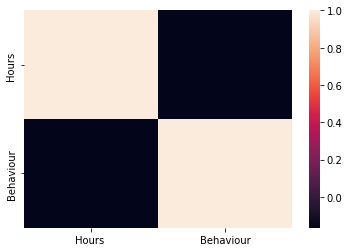

In [ ]:
ax = sns.heatmap(data1.corr())

### Count Plot of **Behaviour**

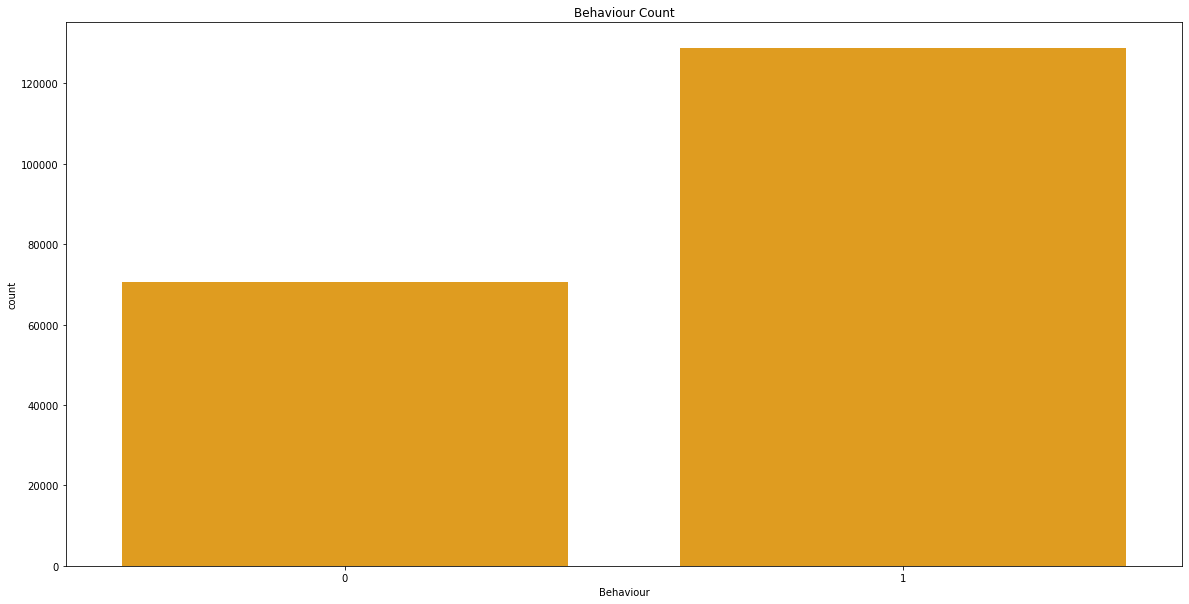

In [ ]:
plt.figure(figsize=(20,10))
plt.title('Behaviour Count')
sns.countplot(data=data1, x ='Behaviour',color='orange');

### Density Plot

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f38dd6da250>,
      dtype=object)

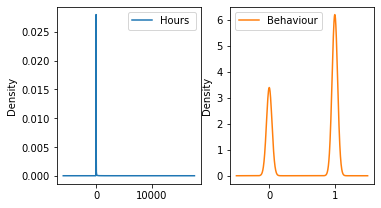

In [ ]:
data1.plot(kind="density", layout=(4,5),subplots=True, figsize=(15,15), sharex=False)

In [ ]:
data1.values

array([['The Elder Scrolls V Skyrim', 1.0, 1],
       ['The Elder Scrolls V Skyrim', 273.0, 0],
       ['Fallout 4', 1.0, 1],
       ...,
       ['Grand Theft Auto Vice City', 1.5, 0],
       ['RUSH', 1.0, 1],
       ['RUSH', 1.4, 0]], dtype=object)

In [ ]:
list(data1['Name'].values)

['The Elder Scrolls V Skyrim',
 'The Elder Scrolls V Skyrim',
 'Fallout 4',
 'Fallout 4',
 'Spore',
 'Spore',
 'Fallout New Vegas',
 'Fallout New Vegas',
 'Left 4 Dead 2',
 'Left 4 Dead 2',
 'HuniePop',
 'HuniePop',
 'Path of Exile',
 'Path of Exile',
 'Poly Bridge',
 'Poly Bridge',
 'Left 4 Dead',
 'Left 4 Dead',
 'Team Fortress 2',
 'Team Fortress 2',
 'Tomb Raider',
 'Tomb Raider',
 'The Banner Saga',
 'The Banner Saga',
 'Dead Island Epidemic',
 'Dead Island Epidemic',
 'BioShock Infinite',
 'BioShock Infinite',
 'Dragon Age Origins - Ultimate Edition',
 'Dragon Age Origins - Ultimate Edition',
 'Fallout 3 - Game of the Year Edition',
 'Fallout 3 - Game of the Year Edition',
 'SEGA Genesis & Mega Drive Classics',
 'SEGA Genesis & Mega Drive Classics',
 'Grand Theft Auto IV',
 'Grand Theft Auto IV',
 'Realm of the Mad God',
 'Realm of the Mad God',
 'Marvel Heroes 2015',
 'Marvel Heroes 2015',
 'Eldevin',
 'Eldevin',
 'Dota 2',
 'Dota 2',
 'BioShock',
 'BioShock',
 'Robocraft',
 'Ro

In [ ]:
np.savetxt(r'data.txt', data1['Name'].values,  fmt='%s')

In [ ]:
data1

,Name,Hours,Behaviour
0,The Elder Scrolls V Skyrim,1.0,1
1,The Elder Scrolls V Skyrim,273.0,0
2,Fallout 4,1.0,1
3,Fallout 4,87.0,0
4,Spore,1.0,1
...,...,...,...
199995,Titan Souls,1.5,0
199996,Grand Theft Auto Vice City,1.0,1
199997,Grand Theft Auto Vice City,1.5,0
199998,RUSH,1.0,1


In [ ]:
display(data1.head())

,Name,Hours,Behaviour
0,The Elder Scrolls V Skyrim,1.0,1
1,The Elder Scrolls V Skyrim,273.0,0
2,Fallout 4,1.0,1
3,Fallout 4,87.0,0
4,Spore,1.0,1


In [ ]:
temp = pd.DataFrame(data1['Name'])

In [ ]:
temp

,Name
0,The Elder Scrolls V Skyrim
1,The Elder Scrolls V Skyrim
2,Fallout 4
3,Fallout 4
4,Spore
...,...
199995,Titan Souls
199996,Grand Theft Auto Vice City
199997,Grand Theft Auto Vice City
199998,RUSH


In [ ]:
temp['Name'][0][4:9]

'Elder'

In [ ]:
temp['Name'].head()

0    The Elder Scrolls V Skyrim
1    The Elder Scrolls V Skyrim
2                     Fallout 4
3                     Fallout 4
4                         Spore
Name: Name, dtype: object

In [ ]:
association_rules = apriori(temp['Name'][0][4:9], min_support=0.0045, min_confidence=0.2, min_lift=3, min_length=5)
association_results = list(association_rules)

In [ ]:
print("There are {} Relation derived.".format(len(association_results)))

There are 0 Relation derived.


In [ ]:
for i in range(0, len(association_results)):
    print(association_results[i][0])

frozenset({' ', 'H'})
frozenset({'s', ' '})
frozenset({'B', 'h'})
frozenset({'B', 'i'})
frozenset({'v', 'B'})
frozenset({'s', 'H'})
frozenset({'m', 'N'})
frozenset({'i', 'h'})
frozenset({'v', 'h'})
frozenset({'v', 'i'})
frozenset({' ', 'H', 'o'})
frozenset({'r', ' ', 'H'})
frozenset({'s', ' ', 'H'})
frozenset({' ', 'u', 'H'})
frozenset({'s', ' ', 'o'})
frozenset({'s', 'r', ' '})
frozenset({'s', ' ', 'u'})
frozenset({'a', 'B', 'h'})
frozenset({'a', 'B', 'i'})
frozenset({'a', 'B', 'o'})
frozenset({'a', 'r', 'B'})
frozenset({'a', 'u', 'B'})
frozenset({'a', 'v', 'B'})
frozenset({'e', 'B', 'h'})
frozenset({'e', 'B', 'i'})
frozenset({'e', 'B', 'o'})
frozenset({'e', 'r', 'B'})
frozenset({'e', 'u', 'B'})
frozenset({'e', 'v', 'B'})
frozenset({'i', 'B', 'h'})
frozenset({'B', 'o', 'h'})
frozenset({'r', 'B', 'h'})
frozenset({'u', 'B', 'h'})
frozenset({'v', 'B', 'h'})
frozenset({'B', 'o', 'i'})
frozenset({'r', 'B', 'i'})
frozenset({'u', 'B', 'i'})
frozenset({'v', 'B', 'i'})
frozenset({'v', 'B', 'o'

In [ ]:
for item in association_results:
    # first index of the inner list
    # Contains base item and add item
    pair = item[0]
    items = [x for x in pair]
    print("Rule: " + items[0] + " -> " + items[1])

    # second index of the inner list
    print("Support: " + str(item[1]))

    # third index of the list located at 0th
    # of the third index of the inner list

    print("Confidence: " + str(item[2][0][2]))
    print("Lift: " + str(item[2][0][3]))
    print("=====================================")

Rule:   -> H
Support: 0.3333333333333333
Confidence: 1.0
Lift: 3.0
Rule: s ->  
Support: 0.3333333333333333
Confidence: 1.0
Lift: 3.0
Rule: B -> h
Support: 0.3333333333333333
Confidence: 1.0
Lift: 3.0
Rule: B -> i
Support: 0.3333333333333333
Confidence: 1.0
Lift: 3.0
Rule: v -> B
Support: 0.3333333333333333
Confidence: 1.0
Lift: 3.0
Rule: s -> H
Support: 0.3333333333333333
Confidence: 1.0
Lift: 3.0
Rule: m -> N
Support: 0.3333333333333333
Confidence: 1.0
Lift: 3.0
Rule: i -> h
Support: 0.3333333333333333
Confidence: 1.0
Lift: 3.0
Rule: v -> h
Support: 0.3333333333333333
Confidence: 1.0
Lift: 3.0
Rule: v -> i
Support: 0.3333333333333333
Confidence: 1.0
Lift: 3.0
Rule:   -> H
Support: 0.3333333333333333
Confidence: 1.0
Lift: 3.0
Rule: r ->  
Support: 0.3333333333333333
Confidence: 1.0
Lift: 3.0
Rule: s ->  
Support: 0.3333333333333333
Confidence: 1.0
Lift: 3.0
Rule:   -> u
Support: 0.3333333333333333
Confidence: 1.0
Lift: 3.0
Rule: s ->  
Support: 0.3333333333333333
Confidence: 1.0
Lift:

### We can infer that for an attribute named 'Behaviour' itself 476 frequency itemsets were found and so if it were to be done for all Names of Games, then it would be computationally Expensive